In [31]:


import pandas as pd

df = pd.read_csv(r"C:\Users\saksh\Downloads\python project\update_online.csv")

print(df.head())


  stockcode                  description  quantity  revenue    profit
0     10002  INFLATABLE POLITICAL GLOBE        860   759.89  189.9725
1     10002                          NaN       177     0.00    0.0000
2     10080                        check        22     0.00    0.0000
3     10080     GROOVY CACTUS INFLATABLE       303   119.09   29.7725
4     10080                          NaN       170     0.00    0.0000


In [32]:
df = df.dropna(subset=['description'])  # Remove rows with missing descriptions
df['description'] = df['description'].str.strip().str.title()  # Clean up product names
print(df)

     stockcode                 description  quantity    revenue       profit
0        10002  Inflatable Political Globe       860    759.890    189.97250
2        10080                       Check        22      0.000      0.00000
3        10080    Groovy Cactus Inflatable       303    119.090     29.77250
5        10120                Doggy Rubber       193     40.530     10.13250
6       10123C        Hearts Wrapping Tape         5      3.250      0.81250
...        ...                         ...       ...        ...          ...
5746         m                      Manual         1      2.550      0.63750
5747         M                      Manual      3164 -68674.190 -17168.54750
5748      PADS  Pads To Match All Cushions         4      0.003      0.00075
5749      POST                     Postage      3003  66230.640  16557.66000
5751         S                     Samples       -59  -3049.390   -762.34750

[4792 rows x 5 columns]


In [33]:
print(df.columns)



Index(['stockcode', 'description', 'quantity', 'revenue', 'profit'], dtype='object')


In [34]:
print(df.isnull().sum())


stockcode      0
description    0
quantity       0
revenue        0
profit         0
dtype: int64


In [35]:
df = df.dropna(subset=["description", "quantity"])


In [37]:
df["quantity"] = pd.to_numeric(df["quantity"], errors="coerce")
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")
df["profit"] = pd.to_numeric(df["profit"], errors="coerce")
print(df)

     stockcode                 description  quantity    revenue       profit
0        10002  Inflatable Political Globe       860    759.890    189.97250
2        10080                       Check        22      0.000      0.00000
3        10080    Groovy Cactus Inflatable       303    119.090     29.77250
5        10120                Doggy Rubber       193     40.530     10.13250
6       10123C        Hearts Wrapping Tape         5      3.250      0.81250
...        ...                         ...       ...        ...          ...
5746         m                      Manual         1      2.550      0.63750
5747         M                      Manual      3164 -68674.190 -17168.54750
5748      PADS  Pads To Match All Cushions         4      0.003      0.00075
5749      POST                     Postage      3003  66230.640  16557.66000
5751         S                     Samples       -59  -3049.390   -762.34750

[4792 rows x 5 columns]


In [38]:
df["inventorydays"] = 365 / (df["quantity"] / 12)


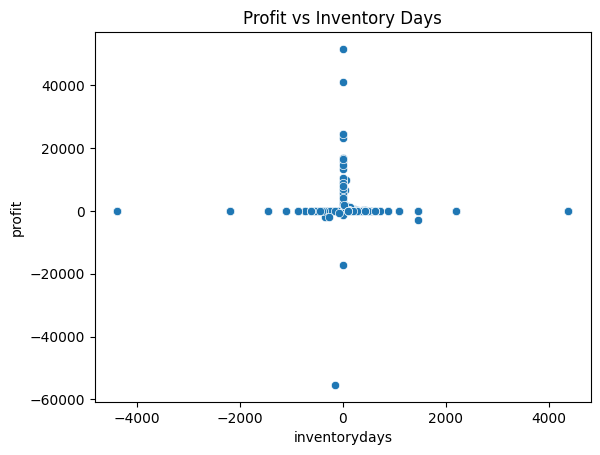

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="inventorydays", y="profit", data=df)
plt.title("Profit vs Inventory Days")
plt.show()


In [40]:
correlation = df["inventorydays"].corr(df["profit"])
print(f"Correlation between Inventory Days and Profit: {correlation:.2f}")


Correlation between Inventory Days and Profit: nan


C:\Users\saksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_function_base_impl.py:2888: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [43]:
# Example rule: Inventory Days > 180 means slow-moving
df["status"] = df["inventorydays"].apply(lambda x: "Overstocked" if x > 180 else "Normal")
print(df)

     stockcode                 description  quantity    revenue       profit  \
0        10002  Inflatable Political Globe       860    759.890    189.97250   
2        10080                       Check        22      0.000      0.00000   
3        10080    Groovy Cactus Inflatable       303    119.090     29.77250   
5        10120                Doggy Rubber       193     40.530     10.13250   
6       10123C        Hearts Wrapping Tape         5      3.250      0.81250   
...        ...                         ...       ...        ...          ...   
5746         m                      Manual         1      2.550      0.63750   
5747         M                      Manual      3164 -68674.190 -17168.54750   
5748      PADS  Pads To Match All Cushions         4      0.003      0.00075   
5749      POST                     Postage      3003  66230.640  16557.66000   
5751         S                     Samples       -59  -3049.390   -762.34750   

      inventorydays       status  
0   

In [44]:
df.to_csv("processed_retail_data.csv", index=False)
print(df)


     stockcode                 description  quantity    revenue       profit  \
0        10002  Inflatable Political Globe       860    759.890    189.97250   
2        10080                       Check        22      0.000      0.00000   
3        10080    Groovy Cactus Inflatable       303    119.090     29.77250   
5        10120                Doggy Rubber       193     40.530     10.13250   
6       10123C        Hearts Wrapping Tape         5      3.250      0.81250   
...        ...                         ...       ...        ...          ...   
5746         m                      Manual         1      2.550      0.63750   
5747         M                      Manual      3164 -68674.190 -17168.54750   
5748      PADS  Pads To Match All Cushions         4      0.003      0.00075   
5749      POST                     Postage      3003  66230.640  16557.66000   
5751         S                     Samples       -59  -3049.390   -762.34750   

      inventorydays       status  
0   